In [1]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np  # Importing numpy library for array operations
import seaborn as sns  # Importing seaborn for statistical data visualization

import matplotlib.pyplot as plt  # Importing matplotlib's pyplot module for creating plots
import matplotlib.mlab as mlab  # Importing matplotlib's mlab module for numerical and mathematical functions
import matplotlib  # Importing the main matplotlib library

plt.style.use('ggplot')  # Setting the plot style to 'ggplot' for aesthetic plots
from matplotlib.pyplot import figure  # Importing the 'figure' function from matplotlib.pyplot

# Magic command to display matplotlib plots inline in Jupyter
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Setting default figure size for plots



In [2]:
# READ DATA FROM movies.csv
df = pd.read_csv('movies.csv')

In [3]:
#DISPLAY DATA
df.head() #Displays first 5 lines

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# CHECK ALL COLUMNS FOR MISSING DATA
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))




name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
#IMPUTATION FOR NUMERICAL COLUMNS
# Filling missing values for 'budget' with the mean
df['budget'].fillna(df['budget'].mean(), inplace=True)

# Filling missing values for 'gross' with the mean
df['gross'].fillna(df['gross'].mean(), inplace=True)


In [6]:
#IMPUTATION FOR CATEGORICAL COLUMNS
# Filling missing values for 'rating' with the most common rating
most_common_rating = df['rating'].mode()[0]
df['rating'].fillna(most_common_rating, inplace=True)


In [7]:
# RECHECK ALL COLUMNS FOR MISSING DATA
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [34]:
#DATA TYPE OF COLUMNS
df.dtypes


name         object
rating       object
genre        object
year         object
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [38]:
#DATA CLEANSING 
#Change Data Typ of votes, budget, and gross from Float64 to Int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [13]:
#YOU CAN ALSO CHECK FOR NON - FINITE VALUES and FILL 
print("Non-finite values in 'votes':", df['votes'].isnull().sum()) #3 were found
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['votes'] = df['votes'].astype('int64')

Non-finite values in 'votes': 3


In [15]:
#CREATE COUNTRY COLUMN
df['country'] = df['released'].str.extract(r'\((.*?)\)')
# Let's see the DataFrame to check the new 'country' column
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [16]:
#RECREATE YEAR COLUMN - AS THERE ARE DISPARITIES
df['year'] = df['released'].str.extract(r'(\d{4})')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [85]:
#DISPLAY ALL VALUES
#pd.set_option('display.max_rows', None)

In [17]:
# Sorting the DataFrame by 'gross' column in descending order
df.sort_values(by='gross', ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2001,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United States,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2020,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [86]:
pd.set_option('display.max_rows', 20)


In [18]:
#DROP ANY DUPLICATES
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,Cameroon,58750,78500541,Embi Productions,NaN
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",NaN,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0


<AxesSubplot:>

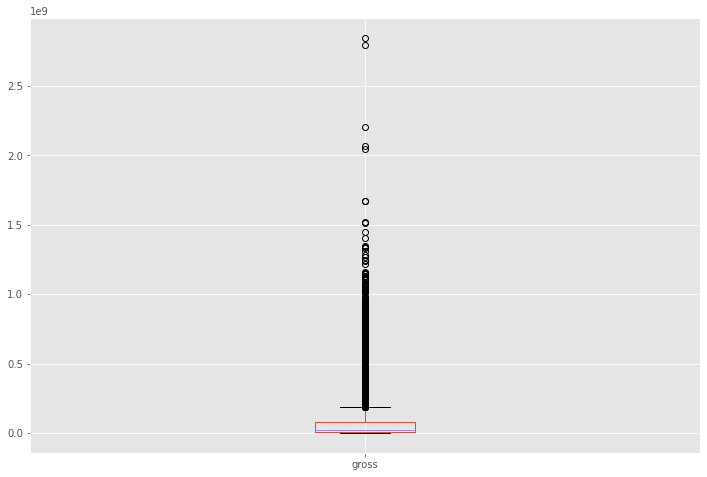

In [25]:
# DATA EXPLORATION 
# Are there any Outliers?

df.boxplot(column=['gross'])

Text(0, 0.5, 'Budget for Film')

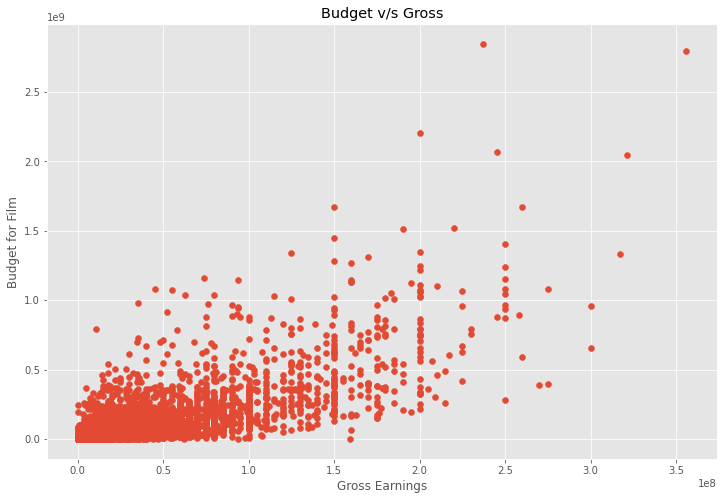

In [27]:
#Correlation - Two COLUMNS (Scatter Plot)

#Budget v/s Gross

plt.scatter(x='budget', y='gross', data=df)
plt.title("Budget v/s Gross")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

<AxesSubplot:xlabel='budget', ylabel='gross'>

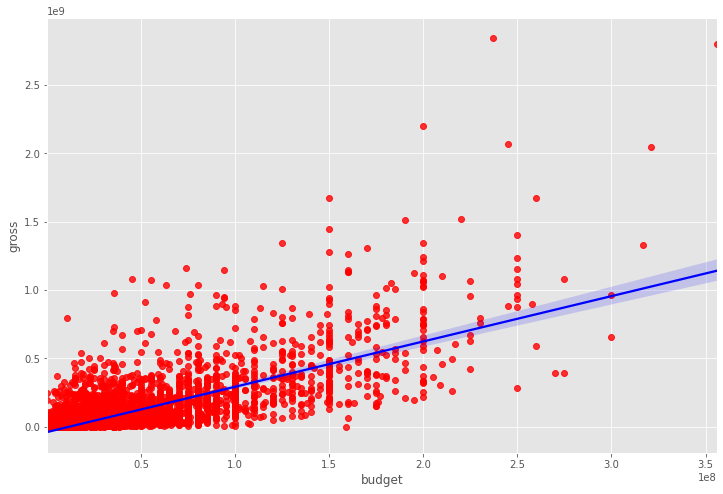

In [32]:
# Correlation using Regression Plot
#Budget v/s Gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [43]:
#CORRELATION FUNCTION FOR NUMERIC COLUMNS - pearson, kendall, spearman
df.corr(method='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.409182,1.000000,0.421007,0.628713,0.309174
budget,0.064554,0.421007,1.000000,0.711270,0.265305
gross,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.399451,0.309174,0.265305,0.241336,1.000000


In [ ]:
#High Correlation between budget and gross.

Text(87.0, 0.5, 'Movie Features')

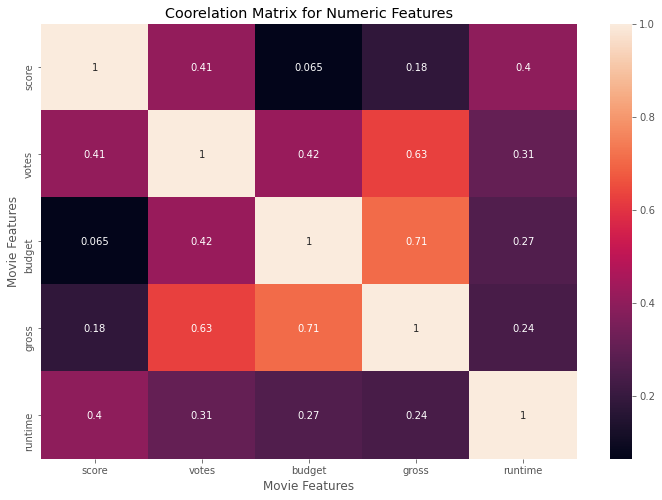

In [47]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Coorelation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [50]:
# Using factorize - this assigns a random numeric value for each unique categorical value
df_numerized = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


Text(87.0, 0.5, 'Movie Features')

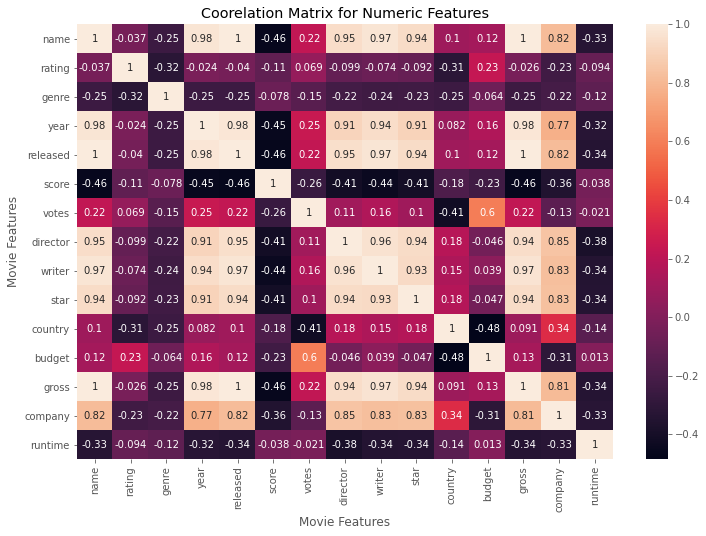

In [54]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Coorelation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [59]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.037448
          genre      -0.247625
          year        0.976383
          released    0.998927
          score      -0.460140
          votes       0.222163
          director    0.945086
          writer      0.971147
          star        0.938310
          country     0.099649
          budget      0.120878
          gross       0.998487
          company     0.817542
          runtime    -0.331648
rating    name       -0.037448
          rating      1.000000
          genre      -0.317621
          year       -0.024362
          released   -0.039790
          score      -0.113995
          votes       0.068927
          director   -0.098704
          writer     -0.074470
          star       -0.092238
          country    -0.312376
          budget      0.230573
          gross      -0.026349
          company    -0.232018
          runtime    -0.093884
genre     name       -0.247625
          rating     -0.317621
        

In [58]:
pd.set_option('display.max_rows', None)

In [60]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    country    -0.483946
country   budget     -0.483946
released  score      -0.461444
score     released   -0.461444
          name       -0.460140
name      score      -0.460140
gross     score      -0.459012
score     gross      -0.459012
          year       -0.454810
year      score      -0.454810
score     writer     -0.439183
writer    score      -0.439183
country   votes      -0.414575
votes     country    -0.414575
director  score      -0.413888
score     director   -0.413888
star      score      -0.406061
score     star       -0.406061
director  runtime    -0.379959
runtime   director   -0.379959
score     company    -0.356111
company   score      -0.356111
runtime   writer     -0.342443
writer    runtime    -0.342443
star      runtime    -0.337932
runtime   star       -0.337932
released  runtime    -0.335559
runtime   released   -0.335559
          gross      -0.335436
gross     runtime    -0.335436
runtime   name       -0.331648
name      runtime    -0.331648
company 

In [61]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

budget    votes       0.595678
votes     budget      0.595678
year      company     0.771187
company   year        0.771187
          gross       0.813461
gross     company     0.813461
name      company     0.817542
company   name        0.817542
released  company     0.820278
company   released    0.820278
writer    company     0.828435
company   writer      0.828435
          star        0.833274
star      company     0.833274
director  company     0.846205
company   director    0.846205
year      star        0.905473
star      year        0.905473
director  year        0.908562
year      director    0.908562
star      writer      0.934566
writer    star        0.934566
gross     star        0.937726
star      gross       0.937726
          name        0.938310
name      star        0.938310
star      director    0.938488
director  star        0.938488
star      released    0.941715
released  star        0.941715
writer    year        0.942676
year      writer      0.942676
director

In [ ]:
#CONCLUSION:

#Votes and Budget have highest Correlation with Gross.